# CREDIT PERFORMANCE ANALYSIS REPORT

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [6]:
Source_File = "C:/Users/Administrator/Desktop/Python/Python Data Analytics project/Credit Performance Analysis/Source Data/financialCredit.xlsx"
df=pd.read_excel(Source_File)
df.head(10)
df.tail(10)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
5,1062608,CA,INDIVIDUAL,3 years,Studio 94 Corp,C,RENT,2021-07-17,2021-03-16,2021-08-12,...,C3,36 months,Not Verified,28000.0,0.1260,275.96,0.1465,8000,11,8637
6,1067441,TX,INDIVIDUAL,10+ years,American Airlines,C,MORTGAGE,2021-11-19,2021-06-14,2021-12-13,...,C2,36 months,Verified,94800.0,0.2453,205.86,0.1427,6000,30,7218
7,1066424,PA,INDIVIDUAL,10+ years,SCI Mahanoy,A,OWN,2021-06-11,2021-07-14,2021-07-14,...,A4,36 months,Source Verified,59000.0,0.0665,172.10,0.0790,5500,23,6172
8,1065254,FL,INDIVIDUAL,10+ years,Tech Data Corp,A,MORTGAGE,2021-09-02,2021-06-15,2021-10-12,...,A5,36 months,Verified,116400.0,0.0394,762.08,0.0890,24000,31,8650
9,1064589,MI,INDIVIDUAL,10+ years,teltow contracting,B,MORTGAGE,2021-02-09,2021-03-16,2021-03-16,...,B5,60 months,Not Verified,36000.0,0.1773,93.21,0.1269,4125,21,5551


### Metadata Exploration

In [20]:
print("Number of rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])
df.info()


Number of rows:  38576
Number of Columns:  24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id     

### Data Types Exploration

In [29]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [27]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


### Number of Loan Applications

In [30]:
Total_Loan_Applications = df['id'].count()
print(" Number of Loan Applications: " ,Total_Loan_Applications)

 Number of Loan Applications:  38576


#### MTD Loan Applications

In [34]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[
         (df['issue_date'].dt.year == latest_year) & 
         (df['issue_date'].dt.month == latest_month)]

mtd_loan_applications = mtd_data['id'].count()

print(f" MTD Loan Applications for ({latest_issue_date.strftime('%B %Y')}) : {mtd_loan_applications}")

 MTD Loan Applications for (December 2021) : 4314


### Total Funded Amount

In [38]:
total_funded_amount = df['loan_amount'].sum()
funded_amount_millons = round(total_funded_amount/1000000,2)
print(f"Total Funded Amount: ${funded_amount_millons}M")

Total Funded Amount: $435.76M


#### MTD Total Funded Amount

In [39]:
mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_funded_amount_millions = round(mtd_total_funded_amount/1000000,2)
print(f" MTD Total Funded Amount : ${mtd_funded_amount_millions}M")

 MTD Total Funded Amount : $53.98M


### Total Amount Recieved

In [41]:
total_recieved_amount = round(df['total_payment'].sum()/1000000,2)
print(f"Total Received Amount : ${total_recieved_amount}M ")

Total Received Amount : $473.07M 


#### MTD Total Amount Recieved

In [43]:
mtd_recieved_amount =round(mtd_data['total_payment'].sum()/1000000,2)
print(f" MTD Total Recieved Amount : ${mtd_recieved_amount}M")

 MTD Total Recieved Amount : $58.07M


### Average Interest Rate

In [44]:
average_interest_rate =round(df['int_rate'].mean()*100,2)
print(f"Average Interest Rate:  {average_interest_rate}%")

Average Interest Rate:  12.05%


### Average Debt to Income Ratio (DTI)

In [45]:
average_DTI =round(df['dti'].mean()*100,2)
print(f"Average Interest Rate:  {average_DTI}%")

Average Interest Rate:  13.33%


## Good Loan Metrics

In [46]:
good_loans = df[df['loan_status'].isin(["Fully Paid","Current"])]

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = round(good_loans['loan_amount'].sum()/1000000,2)
good_loan_recieved = round(good_loans['total_payment'].sum()//1000000,2)

good_loan_percentage = round((good_loan_applications/total_loan_applications)*100,2)

print(f"Good Loan Applications : ${good_loan_applications}M ")
print(f"Good Loan Funded Amount : ${good_loan_funded_amount}M ")
print(f"Good Loan Total Recieved : ${good_loan_recieved}M")
print(f"Percentage of Good Loan Applications : {good_loan_percentage}%")

Good Loan Applications : $33243M 
Good Loan Funded Amount : $370.22M 
Good Loan Total Recieved : $435M
Percentage of Good Loan Applications : 86.18%


## Bad Loan Metrics

In [47]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])]

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = round(bad_loans['loan_amount'].sum()/1000000,2)
bad_loan_recieved = round(bad_loans['total_payment'].sum()//1000000,2)

bad_loan_percentage = round((bad_loan_applications/total_loan_applications)*100,2)

print(f"Bad Loan Applications : ${bad_loan_applications}M ")
print(f"Bad Loan Funded Amount : ${bad_loan_funded_amount}M ")
print(f"Bad Loan Total Recieved : ${bad_loan_recieved}M")
print(f"Percentage of Bad Loan Applications : {bad_loan_percentage}%")

Bad Loan Applications : $5333M 
Bad Loan Funded Amount : $65.53M 
Bad Loan Total Recieved : $37M
Percentage of Bad Loan Applications : 13.82%


## Monthly Trends by Issue Date for Total Funded Amount


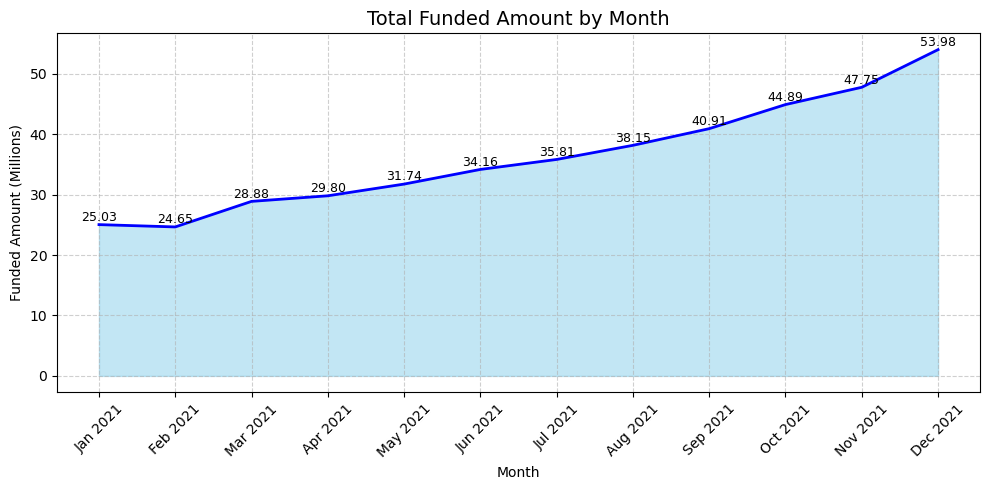

In [48]:
monthly_funded =(
      df.sort_values('issue_date')
     .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y')) 
     .groupby('month_name',sort=False)['loan_amount']
     .sum()
     .div(1_000_000)
     .reset_index(name='loan_amount_millions')	      
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='skyblue',alpha=0.5)
plt.plot(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='blue',linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions']+ 0.1, f"{row['loan_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Funded Amount by Month', fontsize=14)  
plt.xlabel('Month')
plt.ylabel('Funded Amount (Millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'],rotation=45)
plt.grid(True, linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

## Monthly Trends by Issue Date for Total Amount Received

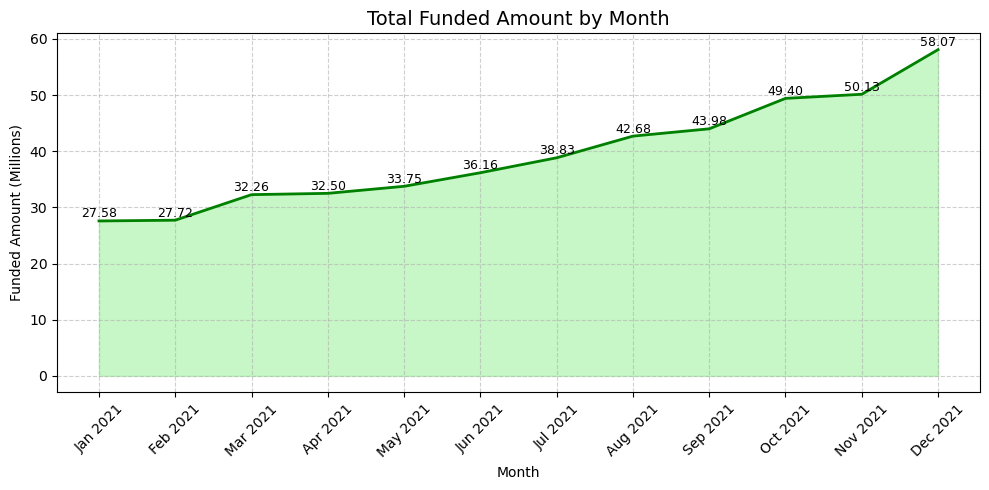

In [54]:
monthly_received =(
      df.sort_values('issue_date')
     .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y')) 
     .groupby('month_name',sort=False)['total_payment']
     .sum()
     .div(1_000_000)
     .reset_index(name='total_received_amount')	      
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_received['month_name'],monthly_received['total_received_amount'],color='lightgreen',alpha=0.5)
plt.plot(monthly_received['month_name'],monthly_received['total_received_amount'],color='green',linewidth=2)

for i, row in monthly_received.iterrows():
    plt.text(i, row['total_received_amount']+ 0.1, f"{row['total_received_amount']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Funded Amount by Month', fontsize=14)  
plt.xlabel('Month')
plt.ylabel('Funded Amount (Millions)')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received['month_name'],rotation=45)
plt.grid(True, linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

## Monthly Trends by Issue Date for Total Loan Applications

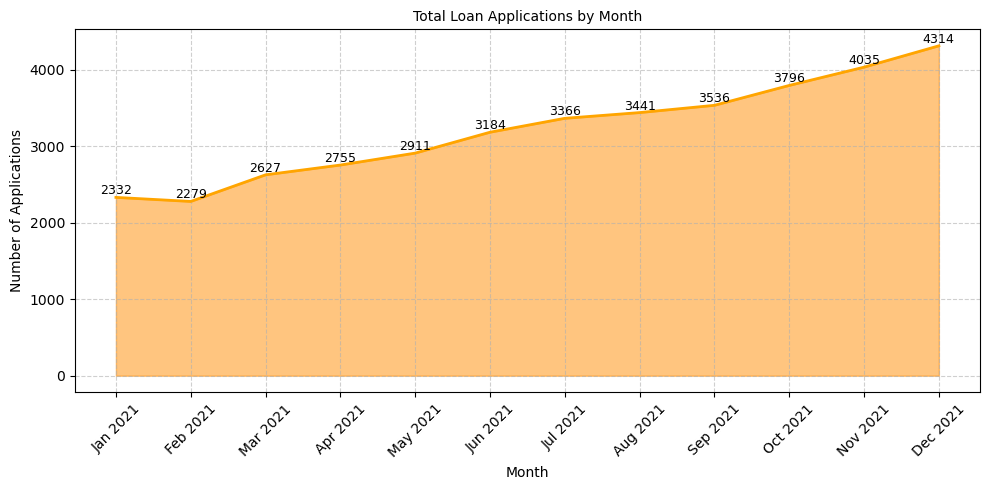

In [58]:
monthly_applications =(
      df.sort_values('issue_date')
     .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y')) 
     .groupby('month_name',sort=False)['id']
     .count()
     .reset_index(name='Total_Loan_Applications')	      
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_applications['month_name'],monthly_applications['Total_Loan_Applications'],color='darkorange',alpha=0.5)
plt.plot(monthly_applications['month_name'],monthly_applications['Total_Loan_Applications'],color='orange',linewidth=2)

for i, row in monthly_applications.iterrows():
    plt.text(i, row['Total_Loan_Applications']+ 0.5, f"{row['Total_Loan_Applications']}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Loan Applications by Month', fontsize=10)  
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'],rotation=45)
plt.grid(True, linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

## Regional Analysis by State Name for Total Funded Amount


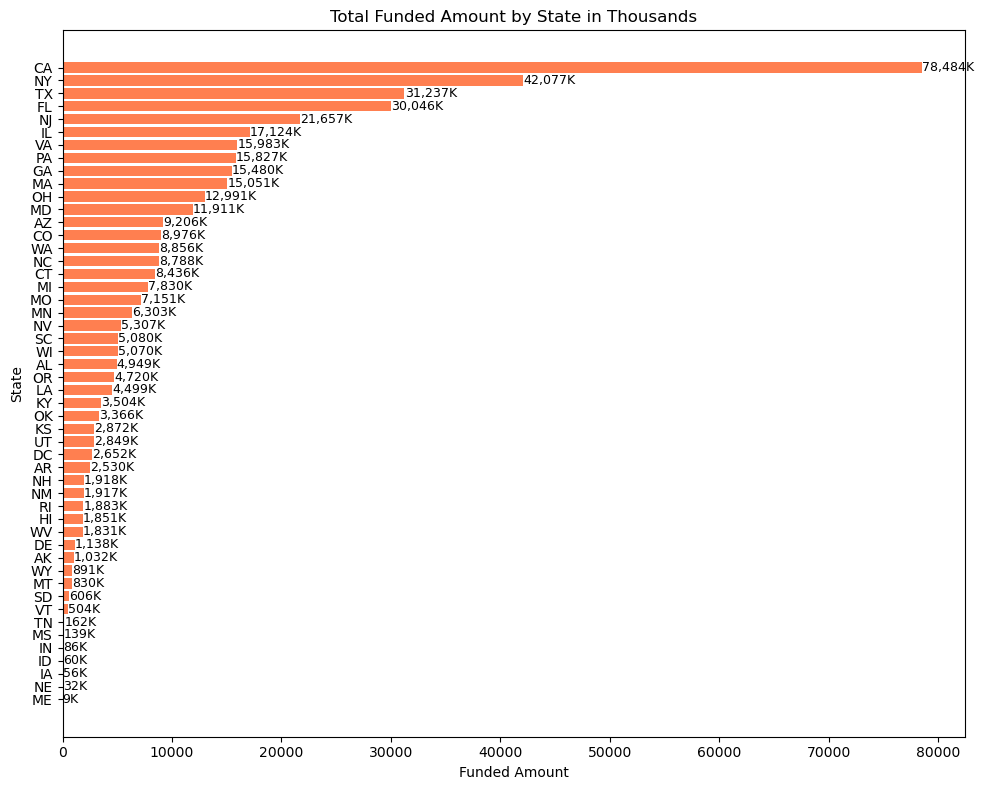

In [62]:
state_funding=df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands=state_funding/1000

plt.figure(figsize=(10,8))
bars= plt.barh(state_funding_thousands.index,state_funding_thousands.values,color='coral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, f'{width:,.0f}K', va='center',fontsize=9)

plt.title('Total Funded Amount by State in Thousands')
plt.xlabel('Funded Amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()

## Loan Term Analysis by Total Funded Amount

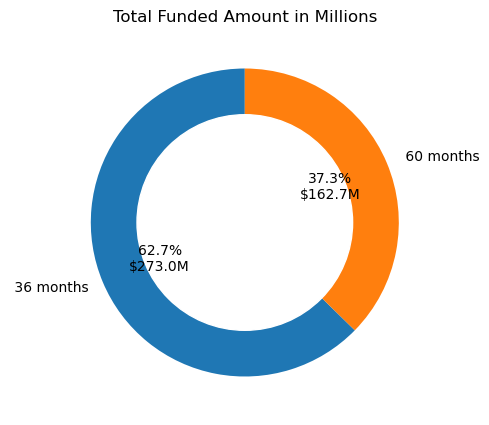

In [63]:
term_funding_millions=df.groupby('term')['loan_amount'].sum()/1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,
    labels= term_funding_millions.index,
    autopct = lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}  
)
plt.gca().add_artist(plt.Circle((0,0),0.70,color='white'))
plt.title("Total Funded Amount in Millions")
plt.show()